In [454]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/antoineguerrini/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/antoineguerrini/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [455]:
#d = pd.read_csv('/Users/antoineguerrini/Desktop/Train_ML.csv', error_bad_lines=False)

In [456]:
#snipet = d.sample(frac=0.045, replace=True, random_state=42)

In [457]:
#snipet.to_excel('Snipet_ML.xlsx')

In [706]:
df = pd.read_excel('/Users/antoineguerrini/SnipetML.xlsx', error_bad_lines=False)

In [707]:
#del df['Unnamed: 0']

In [708]:
df.isnull().sum()

Unnamed: 0       0
ID               0
keywords      1114
age              0
sex              0
dtype: int64

In [709]:
df.dropna(subset=['keywords'], inplace=True)
df.shape

(8886, 5)

In [710]:
df.dtypes

Unnamed: 0     int64
ID             int64
keywords      object
age            int64
sex           object
dtype: object

In [711]:
type(df[:1]["keywords"])

pandas.core.series.Series

### Data processing

In this section we aim to transform the variable "keywords" in order to make it processable for further feature engineerings.

In [712]:
from nltk.corpus import stopwords
stopwords.words('french')

['au',
 'aux',
 'avec',
 'ce',
 'ces',
 'dans',
 'de',
 'des',
 'du',
 'elle',
 'en',
 'et',
 'eux',
 'il',
 'ils',
 'je',
 'la',
 'le',
 'les',
 'leur',
 'lui',
 'ma',
 'mais',
 'me',
 'même',
 'mes',
 'moi',
 'mon',
 'ne',
 'nos',
 'notre',
 'nous',
 'on',
 'ou',
 'par',
 'pas',
 'pour',
 'qu',
 'que',
 'qui',
 'sa',
 'se',
 'ses',
 'son',
 'sur',
 'ta',
 'te',
 'tes',
 'toi',
 'ton',
 'tu',
 'un',
 'une',
 'vos',
 'votre',
 'vous',
 'c',
 'd',
 'j',
 'l',
 'à',
 'm',
 'n',
 's',
 't',
 'y',
 'été',
 'étée',
 'étées',
 'étés',
 'étant',
 'étante',
 'étants',
 'étantes',
 'suis',
 'es',
 'est',
 'sommes',
 'êtes',
 'sont',
 'serai',
 'seras',
 'sera',
 'serons',
 'serez',
 'seront',
 'serais',
 'serait',
 'serions',
 'seriez',
 'seraient',
 'étais',
 'était',
 'étions',
 'étiez',
 'étaient',
 'fus',
 'fut',
 'fûmes',
 'fûtes',
 'furent',
 'sois',
 'soit',
 'soyons',
 'soyez',
 'soient',
 'fusse',
 'fusses',
 'fût',
 'fussions',
 'fussiez',
 'fussent',
 'ayant',
 'ayante',
 'ayantes',


In [713]:
import string
nopunc = [char for char in df if char not in string.punctuation]

We create a function which will 
    
    1) Split the words and the occurences 
    
    2) Assign them to two lists 
    
    3) Create a sentence based on words * occurences 
    
    4) Discard the "stopword"

In [714]:
def processing(x):
    list_subset =[]
    for item in x:
        item = x.split(';') 

    for i in range (0,len(item)):
        list_subset = list_subset+ item[i].split(':')
        
    for i in range (1,len(list_subset)):
        if i%2 !=0:
            list_subset[i] = int(list_subset[i])
            
    integer = [x for x in list_subset if isinstance(x, int)]
    string = [x for x in list_subset if isinstance(x, str)]
    
    word = sum([[s] * n for s, n in zip(string, integer)], [])
    number = [x for x in word if not any(c.isdigit() for c in x)]
    
    final_selection = [y for y in number if word not in stopwords.words('french')]

    return final_selection

In [715]:
df['Full_Wording'] = df["keywords"].apply(processing)

# Feature engineering

In this section we want to create relevant features in order to support our modeling. In order to achieve that objective, we used Counter and Nltk libraries. We parallelly observed the data with visualisations to assess the impact of our findings. (Please refer to the pdf attached to this document).

..



### 1) Extraction of the wording's length

In [716]:
from collections import Counter
length = []
for i in df['Full_Wording']:
    a = len(i)+1
    length.append(a)

In [717]:
df['Length'] = length

![Average Length by Gender](img/length_gender.png)

![Average Length by Gender](img/distance.png)

## 2) Extraction of the words and occurences

In [718]:
Occurence = []
Word = []
for i in df['Full_Wording']:
    b = Counter(i).values()
    c = Counter(i).keys()
    Occurence.append(b)
    Word.append(c)

In [719]:
df["Occurence"] = Occurence
df["Word"] = Word

### 3) Extraction of the unique value

In [720]:
Number_Unique = []
for i in df.Word:
    e = len(Counter(i).keys())
    Number_Unique.append(e)

In [721]:
df["Unique_Value"] = Number_Unique

![Average Length by Gender](img/Unique.png)

### 4) Calculation to compare from the benchmark

In [722]:
mean_unique = df['Unique_Value'].mean()
std_unique = df['Unique_Value'].std()

mean_length = df['Length'].mean()
std_length = df['Length'].std()

In [723]:
df['Unique_from_the_Avg'] = df['Unique_Value'] - mean_unique
df['Unique_volatility'] = df['Unique_Value'] / std_unique

df['Length_from_the_Avg'] = df['Length'] - mean_length
df['Length_volatility'] = df['Unique_Value'] / std_length

In [724]:
df.head()

,Unnamed: 0,ID,keywords,age,sex,Full_Wording,Length,Occurence,Word,Unique_Value,Unique_from_the_Avg,Unique_volatility,Length_from_the_Avg,Length_volatility
0,5571877,4814904,les:1;high:1;leur:1;agent:1;des:1;comme:1;deve...,42,M,"[les, high, leur, agent, des, comme, developpe...",14,"(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1)","(les, high, leur, agent, des, comme, developpe...",13,-5.258384,0.387096,-30.289219,0.108084
1,2029092,232820,anteflechi:1;guerlus:1;forum:1;affich:1;defini...,48,F,"[anteflechi, guerlus, forum, affich, definitio...",11,"(1, 1, 1, 1, 1, 1, 2, 1, 1)","(anteflechi, guerlus, forum, affich, definitio...",9,-9.258384,0.267990,-33.289219,0.074827
2,2718399,78339,epaule:1;forum:1;affich:1;craquements:1;douleu...,47,F,"[epaule, forum, affich, craquements, douleurs]",6,"(1, 1, 1, 1, 1)","(epaule, forum, affich, craquements, douleurs)",5,-13.258384,0.148883,-38.289219,0.041571
4,1209891,183059,tesla:1;embarrasse:1;ouragan:1;photo:10;ses:1;...,47,F,"[tesla, embarrasse, ouragan, photo, photo, pho...",98,"(1, 1, 1, 10, 1, 10, 1, 1, 10, 10, 1, 1, 1, 10...","(tesla, embarrasse, ouragan, photo, ses, prono...",25,6.741616,0.744416,53.710781,0.207853
5,763427,641104,journal:1;jean:1;kardashian:1;laura:1;enfants:...,54,F,"[journal, jean, kardashian, laura, enfants, le...",404,"(1, 1, 1, 1, 1, 43, 1, 1, 1, 1, 1, 1, 1, 43, 1...","(journal, jean, kardashian, laura, enfants, le...",106,87.741616,3.156322,359.710781,0.881299


### 5) Extracting the top frequencies

In [725]:
#df["Occurence"] = df["Occurence"].astype(str)

In [726]:
len(Max)

8886

In [727]:
Max = []
for i in df.Occurence:
    i = max(i,default=0)
    Max.append(i)

In [728]:
df['Max_Frequence'] = Max

In [729]:
df = df.query('Max_Frequence > 1')

### 6) Extracting the top words

In [730]:
#df['Full_Wording'] = df['Full_Wording'].astype(str)

In [731]:
from collections import Counter

def Most_Common(lst):
    data = Counter(lst)
    return data.most_common(1)[0][0]

In [732]:
Top = []
for i in df['Full_Wording']:
    i = Most_Common(i)
    print(i)
    Top.append(i)    

uterus
photo
les
previsions
emploi
marchant
ont
meteo
polemiques
politique
faq
football
les
jour
tous
ville
secondaires
recettes
previsions
dictionnaire
flash
international
photo
affich
photos
contents
aine
auto
faq
quartier
rugby
messages
politique
des
barthelemy
demission
annonce
annonces
emploi
faq
faillite
des
taxe
forum
previsions
annonce
pub
chutent
profile
affich
magazine
forum
annonce
restaurant
but
affich
nicole
people
faq
television
emploi
celebrites
rpl
flash
horoscope
detail_offre
sylvie
acer
flash
pizza
levothyrox
sanctions
meteo
madeleine
article
psychologie
votre
mot
gamma
traitement
flash
nonce
photos
menacees
dikko
coincidences
dictionnaire
previsions
les
qui
assistant
les
perso
emploi
emploi
selection
maman
nord
les
meteo
services
theme
forum
cinema
retraites
recettes
annonce
gonzalez
programme
telephone
senatoriales
affich
homme
photos
ouvrir
motivation
annonce
people
bourgnon
forum
trackers
nosez
annonce
jcms
est
glossary
michel
international
terrain
les
windsor
mod

travail
affich
television
emploi
arc
star
demarrer
hiver
danemark
flash
tennis
cinema
assemblee
emploi
ville
les
meteo
beaute
coins
gastronomie
alertes
celebrites
meteo
coloriages
actualite
connexion
style
ville
detail_offre
tom
frigo
scan
annonce
star
flash
pacs
flash
france
live
recettes
meteo
actualites
emploi
joffre
france
assurance
york
football
detail_offre
lesquels
hans
coree
groups
les
nord
paris
france
les
parfaitement
personnelles
les
des
travail
mort
figaro
meteo
tournage
football
miran
sur
bricolage
article
immobilier
bois
coloriages
meteo
rayon
stars
meteo
indice
dictionnaire
cinema
greve
coloriages
infos
previsions
vauban
actions
eductyl
faut
settings
jobs
les
cadec
prenoms
clement
dictionnaire
des
idees
vol
network
annonce
desherbants
chez
actu
prenoms
maman
separation
devez
affich
selection
previsions
flash
foussier
judiciaire
definition
video
dictionnaire
aliments
emploi
people
affich
recette
emploi
annonce
fashionista
des
france
restaurant
affich
politique
egrener
pre

In [733]:
df['Top_Word'] = Top

### 7) Extracting the words' typology

In [734]:
Typology = []
for i in df['Top_Word']:
    i = nltk.word_tokenize(i)
    e = nltk.pos_tag(i)
    Typology.append(e)

In [735]:
df['Typology'] = Typology

In [736]:
df['Typology'] = df['Typology'].astype(str)

In [737]:
Typology_2 = []
for i in df['Typology']:
    i = i.split(',', 1)[1]
    i = i[:-2]
    Typology_2.append(i)
df['Typology'] = Typology_2

### 8) Simplifying the readability of the variable Age

In [738]:
Age = []
for i in df.age:
    if i < 30:
        Age.append(1)
    elif i < 40:
        Age.append(2)
    elif i < 50:
        Age.append(3)
    elif i < 60:
        Age.append(4)
    else:
        Age.append(5)

In [739]:
df['age'] = Age

# Creating the dataset for the modeling part

In [740]:
data = df[['age', 'sex', 'Length',
       'Unique_Value', 'Unique_from_the_Avg',
       'Unique_volatility', 'Length_from_the_Avg', 'Length_volatility',
       'Max_Frequence', 'Typology']].copy()

### Removing outliers

In [741]:
from scipy.stats import zscore
from scipy import stats
z_scores = stats.zscore(data.Length)

In [742]:
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3)
data = data[filtered_entries]

### Deleting the high correlations 

In [743]:
data.corr()

,age,Length,Unique_Value,Unique_from_the_Avg,Unique_volatility,Length_from_the_Avg,Length_volatility,Max_Frequence
age,1.000000,0.081204,0.075604,0.075604,0.075604,0.081204,0.075604,0.055550
Length,0.081204,1.000000,0.775133,0.775133,0.775133,1.000000,0.775133,0.810986
Unique_Value,0.075604,0.775133,1.000000,1.000000,1.000000,0.775133,1.000000,0.406050
Unique_from_the_Avg,0.075604,0.775133,1.000000,1.000000,1.000000,0.775133,1.000000,0.406050
Unique_volatility,0.075604,0.775133,1.000000,1.000000,1.000000,0.775133,1.000000,0.406050
Length_from_the_Avg,0.081204,1.000000,0.775133,0.775133,0.775133,1.000000,0.775133,0.810986
Length_volatility,0.075604,0.775133,1.000000,1.000000,1.000000,0.775133,1.000000,0.406050
Max_Frequence,0.055550,0.810986,0.406050,0.406050,0.406050,0.810986,0.406050,1.000000


In [749]:
del data['Length']

# Modeling

In [750]:
data.columns

Index(['age', 'sex', 'Unique_Value', 'Unique_from_the_Avg',
       'Unique_volatility', 'Length_from_the_Avg', 'Length_volatility',
       'Max_Frequence', 'Typology'],
      dtype='object')

In [751]:
data = pd.get_dummies(data, columns=['age','Typology'])

In [758]:
X = data.loc[:, data.columns !="sex"]
y = data.loc[:, data.columns =="sex"]

In [768]:
y = pd.get_dummies(y, drop_first=True)

In [770]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 0, stratify = y)

### Radom Forest 

In [774]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0, n_estimators=100)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [775]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.52      0.48      0.50       486
           1       0.57      0.61      0.59       547

    accuracy                           0.55      1033
   macro avg       0.54      0.54      0.54      1033
weighted avg       0.55      0.55      0.55      1033



In [776]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, pred_rfc))

[[233 253]
 [214 333]]


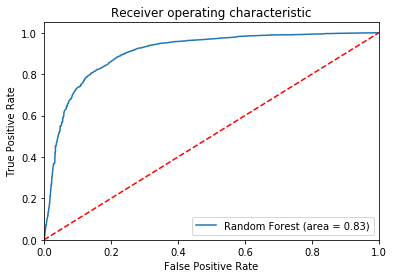

In [795]:
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import roc_curve 

logit_roc_auc = roc_auc_score(y, rfc.predict(X)) 

plt.figure() 
fpr, tpr, thresholds = roc_curve(y, rfc.predict_proba(X)[:,1]) 
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % logit_roc_auc) 
plt.plot([0, 1], [0, 1],'r--') 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Receiver operating characteristic') 
plt.legend(loc="lower right") 
plt.savefig('Log_ROC') 
plt.show()